In [32]:
import os
import cv2
import time
import yt_dlp
import subprocess
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def motion_detection(frames, threshold = 30, min_pixel_count = 100):
    # Check each frame from movement compared to the previous frame.
    difference_frames = []
    movement = False
    
    for i in range(1, len(frames)):
        gray_frame = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        gray_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
        
        previous_gray_frame = cv2.cvtColor(frames[i - 1], cv2.COLOR_BGR2GRAY)
        previous_gray_frame = cv2.GaussianBlur(previous_gray_frame, (5, 5), 0)
        
        difference_frame = cv2.absdiff(gray_frame, previous_gray_frame)
        
        _, difference_threshold = cv2.threshold(difference_frame, threshold, 255, cv2.THRESH_BINARY)
        
        movement_detected = cv2.countNonZero(difference_threshold) > min_pixel_count
        difference_frames.append([movement_detected, difference_threshold])
        
        movement |= movement_detected
        
    return movement, np.array(difference_frames, dtype = "object")

## Saved images

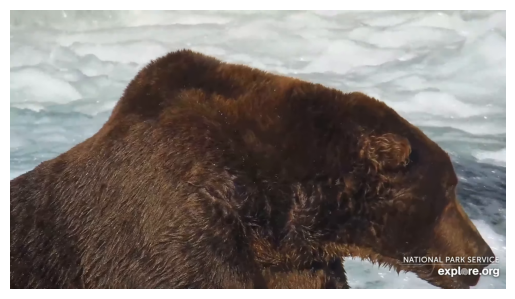

In [3]:
FOLDER_PATH = "../data/1_frame_per_second/high_movement_close_range/"
FRAMES = []


for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith(".png"):
        img_path = os.path.join(FOLDER_PATH, file_name)
        img = cv2.imread(img_path)
        
        FRAMES.append(img)
        
plt.axis("off")
plt.imshow(cv2.cvtColor(FRAMES[0], cv2.COLOR_BGR2RGB))

Movement detected: True


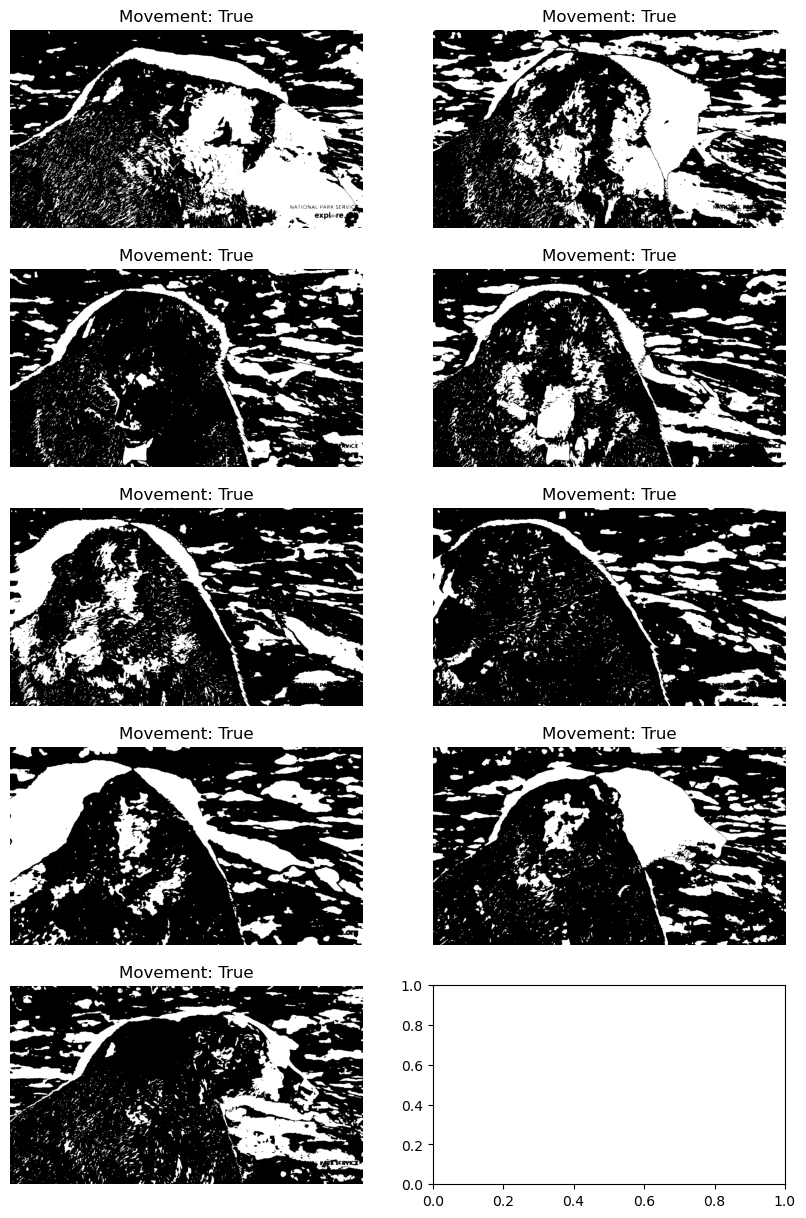

In [4]:
movement, movement_frames = motion_detection(FRAMES, 30, 1000)

print("Movement detected:", movement)

fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for (i, frame) in enumerate(movement_frames[:, 1]):
    axes[i // 2, i % 2].imshow(frame, cmap = "gray")
    axes[i // 2, i % 2].axis("off")
    axes[i // 2, i % 2].set_title(f"Movement: { movement_frames[i][0]}")

## From livestream

In [5]:
# urls = ["https://www.youtube.com/watch?v=nzzBwdxfpqo", "https://www.youtube.com/live/HsLvnFQW_yM?si=eltOk2O69icwtRF1"]

# ydl_opts = {'format': 'best[ext=mp4]', 'quiet': True,}
# ydl = yt_dlp.YoutubeDL(ydl_opts)

# url = urls[0]

# info_dict = ydl.extract_info(url, download=False)
# video_url = info_dict.get("url")

In [6]:
# subprocess.run([
#     'ffmpeg',
#     '-i', video_url,
#     '-t', '10',  # Set duration to 10 seconds
#     'output.mp4'
# ])

In [7]:
# VIDEO_FRAMES = []
# cap = cv2.VideoCapture("output.mp4")
# fps = cap.get(cv2.CAP_PROP_FPS)
# fps_interval = int(fps)

# frame_count = 0
# success = True
# while success:
#     success, frame = cap.read()
    
#     if not success:
#         cap.release()
#         break
    
#     time_in_secods = frame_count // fps
    
#     if frame_count % fps_interval == 0:
#         VIDEO_FRAMES.append(frame)
        
#     frame_count += 1
    
# print("Extracted frames:", len(VIDEO_FRAMES))

In [8]:
# movement, movement_frames = motion_detection(VIDEO_FRAMES, 30, 1000)

# print("Movement detected:", movement)

# fig, axes = plt.subplots(5, 2, figsize=(10, 15))
# for (i, frame) in enumerate(movement_frames[:, 1]):
#     axes[i // 2, i % 2].imshow(frame, cmap = "gray")
#     axes[i // 2, i % 2].axis("off")
#     axes[i // 2, i % 2].set_title(f"Movement: { movement_frames[i][0]}")

# From saved video

In [9]:
videos = ["../src/stream_downloader/streams/HsLvnFQW_yM/20231202_115928.mp4", "../src/stream_downloader/streams/Ihr_nwydXi0/20231202_115928.mp4", "../src/stream_downloader/streams/yPSYdCWRWFA/20231202_115927.mp4"]

In [10]:
import cv2


def get_frames_from_video(video_path, fps=1) -> list:
    """
    Get frames from video with specified fps.

    :param video_path: path to video.
    :param fps: frames per second.
    :return: list of frames.
    """

    frames = []

    video = cv2.VideoCapture(video_path)
    video_fps = int(video.get(cv2.CAP_PROP_FPS))
    video_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps_interval = video_fps // fps

    for frame_i in range(0, video_frames, fps_interval):
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_i)
        ret, frame = video.read()

        if ret:
            frames.append(frame)

    video.release()

    return frames

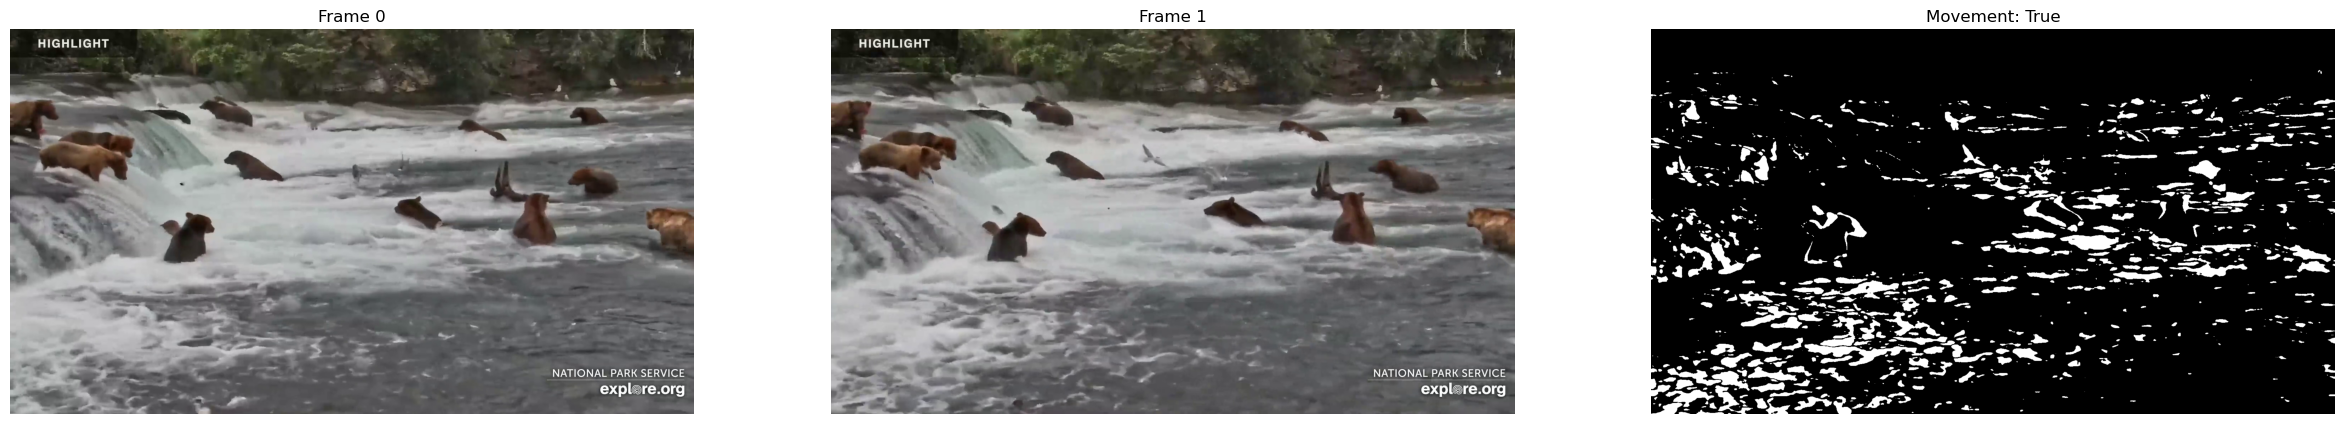

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
for (i, video) in enumerate(videos[:1]):
    frames = get_frames_from_video(video, 1)[:2]
    
    _, movement_frames = motion_detection(frames, 30, 100)
    
    axes[0].imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
    axes[0].axis("off")
    axes[0].set_title("Frame 0")
    
    axes[1].imshow(cv2.cvtColor(frames[1], cv2.COLOR_BGR2RGB))
    axes[1].axis("off")
    axes[1].set_title("Frame 1")
    
    axes[2].imshow(movement_frames[0][1], cmap = "gray")
    axes[2].axis("off")
    axes[2].set_title(f"Movement: { movement_frames[0][0]}")

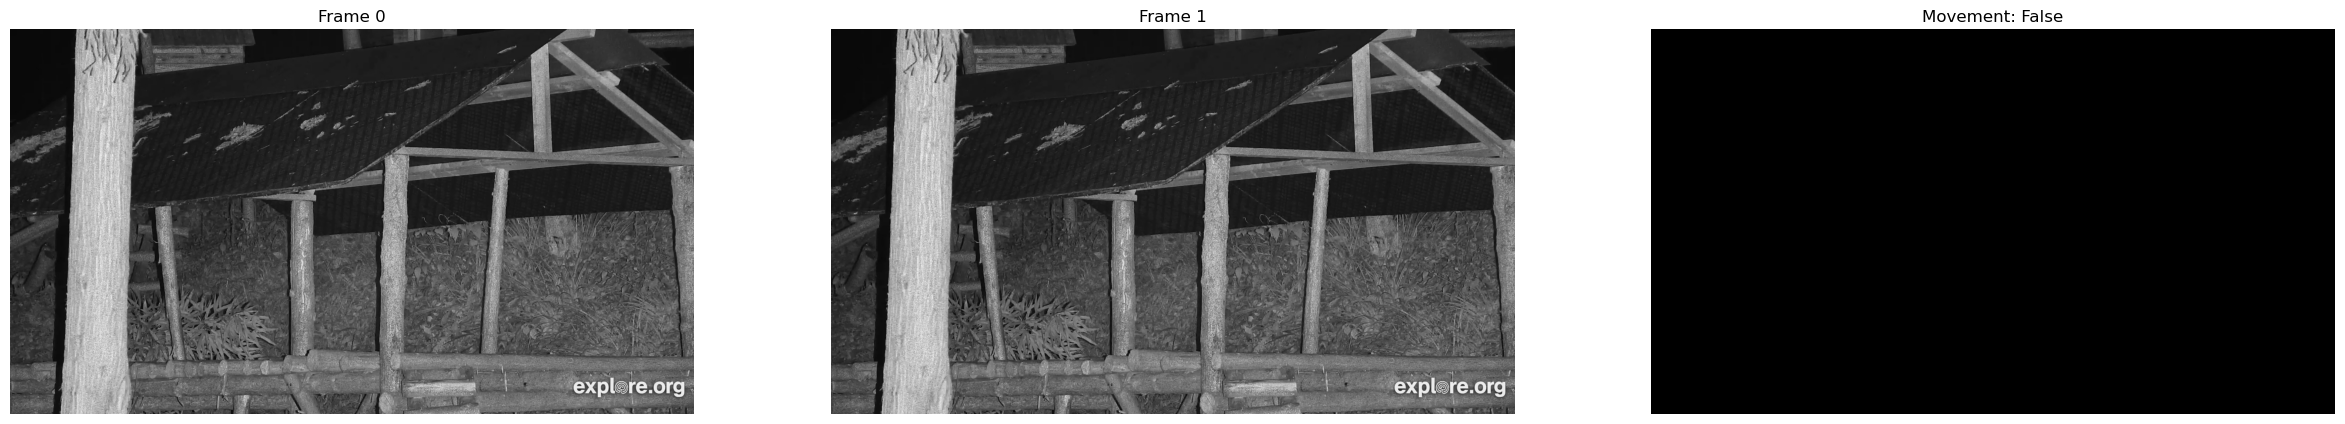

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
for (i, video) in enumerate(videos[1:2]):
    frames = get_frames_from_video(video, 1)[:2]
    
    _, movement_frames = motion_detection(frames, 30, 100)
    
    axes[0].imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
    axes[0].axis("off")
    axes[0].set_title("Frame 0")
    
    axes[1].imshow(cv2.cvtColor(frames[1], cv2.COLOR_BGR2RGB))
    axes[1].axis("off")
    axes[1].set_title("Frame 1")
    
    axes[2].imshow(movement_frames[0][1], cmap = "gray")
    axes[2].axis("off")
    axes[2].set_title(f"Movement: { movement_frames[0][0]}")

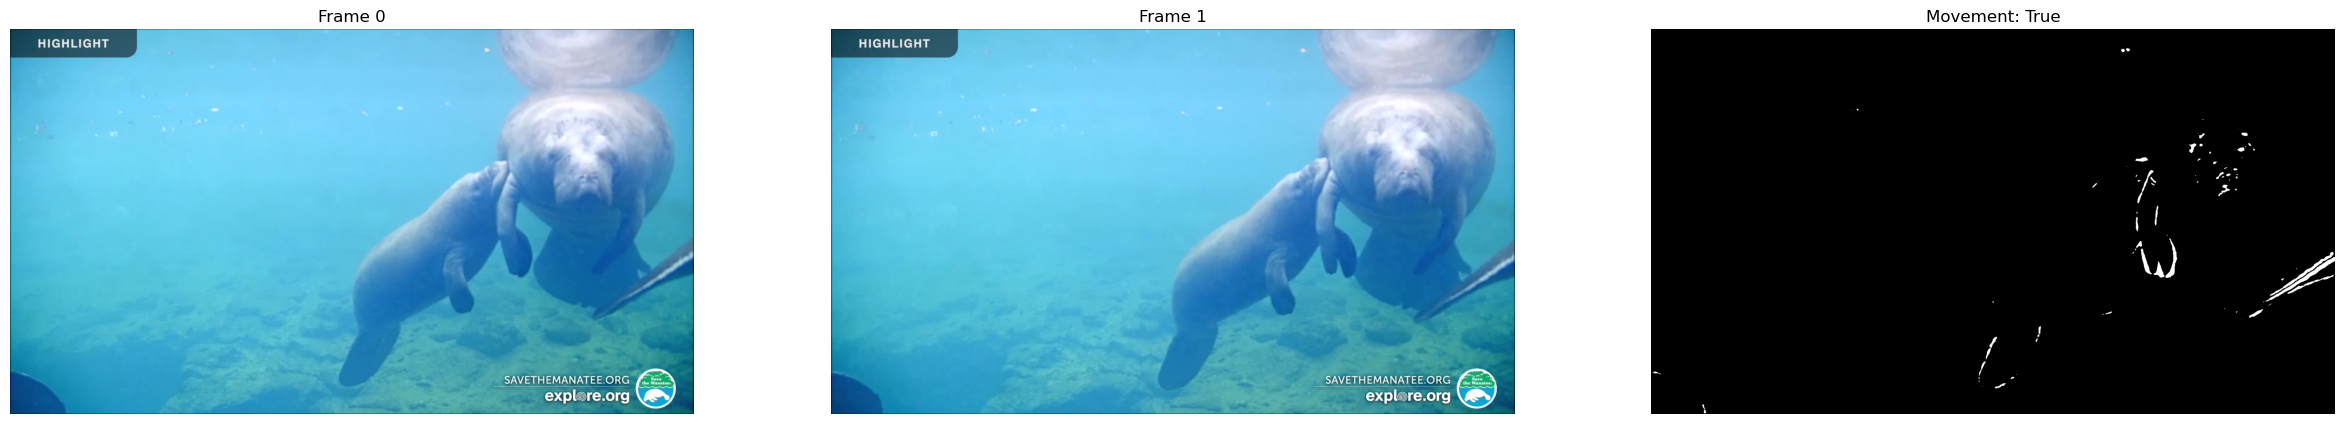

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
for (i, video) in enumerate(videos[2:3]):
    frames = get_frames_from_video(video, 1)[:2]
    
    _, movement_frames = motion_detection(frames, 30, 100)
    
    axes[0].imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
    axes[0].axis("off")
    axes[0].set_title("Frame 0")
    
    axes[1].imshow(cv2.cvtColor(frames[1], cv2.COLOR_BGR2RGB))
    axes[1].axis("off")
    axes[1].set_title("Frame 1")
    
    axes[2].imshow(movement_frames[0][1], cmap = "gray")
    axes[2].axis("off")
    axes[2].set_title(f"Movement: { movement_frames[0][0]}")